<a href="https://colab.research.google.com/github/Aman12457/Upgradation/blob/main/MLR_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
df_index = pd.read_csv('economic_index.csv')

In [33]:
df_index.head(2)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394


## Drop unnecessary columns

In [34]:
df_index.drop(columns=["Unnamed: 0","year","month"] , axis=1,inplace=True)

In [35]:
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


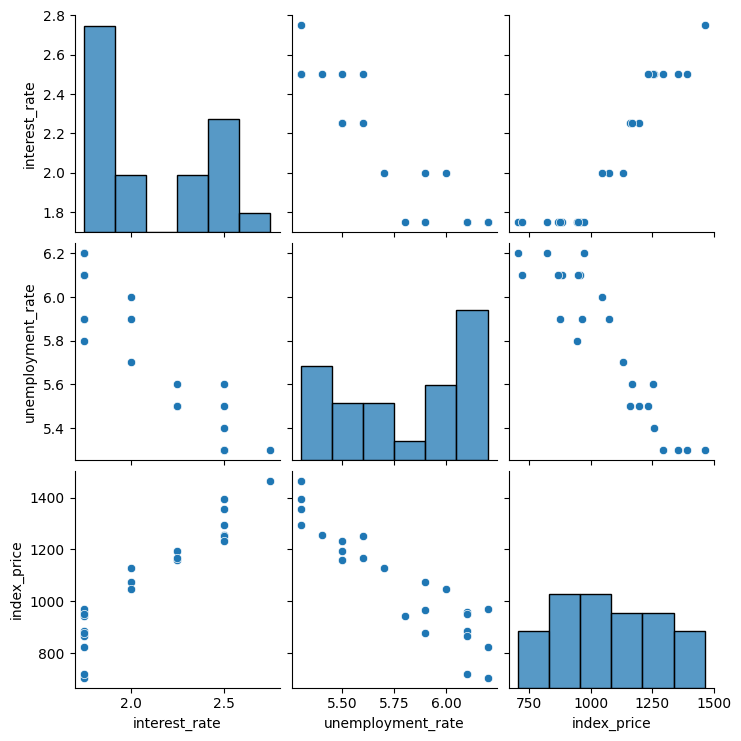

In [36]:
sns.pairplot(df_index)

In [37]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


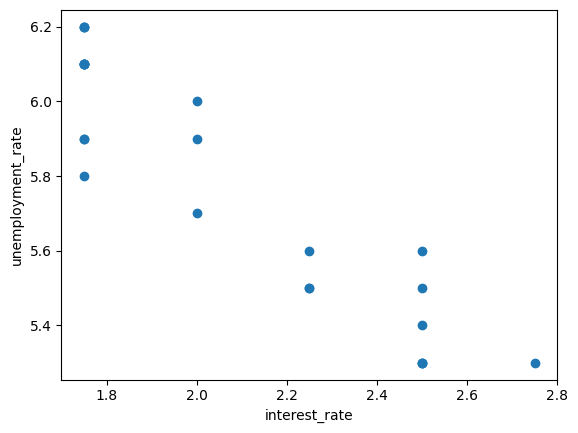

In [38]:
## Let's see more scatterplot
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()

In [39]:
## creating independent and dependent features
X = df_index[['interest_rate','unemployment_rate']]

In [40]:
X.shape

(24, 2)

In [41]:
y = df_index.iloc[: ,-1]

In [42]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

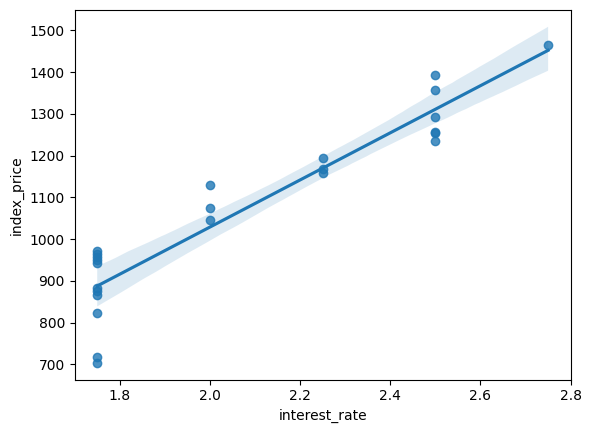

In [43]:
## regplot
sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
## cross-validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model , X_train , y_train , scoring ='neg_mean_squared_error' ,cv=3 )

In [48]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [49]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [50]:
## prediction
y_pred = model.predict(X_test)

In [51]:
## Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [52]:
## print evaluation metrics
print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R2 : ",r2)

MAE :  59.935781523235484
MSE :  5793.762887712569
RMSE :  76.11677139574805
R2 :  0.8278978091457145


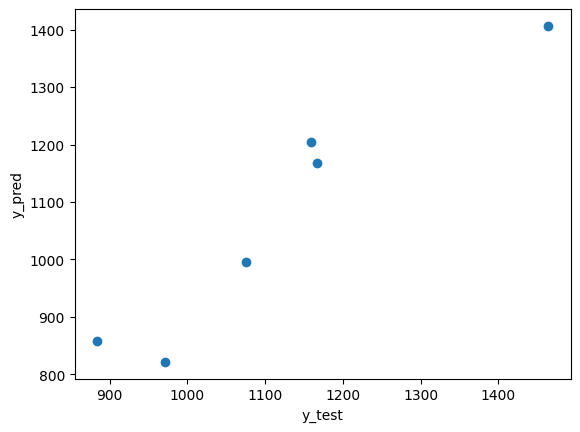

In [53]:
## Assumptions
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [54]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


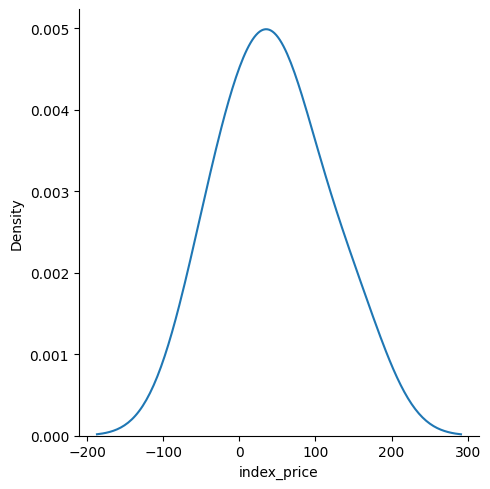

In [55]:
sns.displot(residuals,kind='kde')